Help is available on : https://www.youtube.com/watch?v=Rgr_3iXORmo

In [1]:
# install pycaret
! pip install pycaret

# pip install pycaret[full]

     |████████████████████████████████| 266kB 6.9MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 276kB 17.0MB/s 
     |████████████████████████████████| 14.2MB 306kB/s 
     |████████████████████████████████| 2.0MB 42.2MB/s 
     |████████████████████████████████| 1.7MB 38.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 174kB 35.6MB/s 
     |████████████████████████████████| 1.4MB 39.3MB/s 
     |████████████████████████████████| 112kB 54.2MB/s 
     |████████████████████████████████| 6.8MB 41.6MB/s 
     |████████████████████████████████| 245kB 40.1MB/s 
     |████████████████████████████████| 1.2MB 39.6MB/s 
     |████████████████████████████████| 153kB 50.4MB/s 
     |████████████████████████████████| 163kB 41.6MB

In [2]:
from pycaret.utils import version
version()

'2.3.1'

In [3]:
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Col1,1000.0,0.491362,0.259138,0.000000,0.287458,0.492070,0.694192,0.994431
Col2,1000.0,0.490200,0.251931,0.000000,0.291449,0.488656,0.686531,1.000000
Col3,1000.0,0.509077,0.256606,0.000000,0.337802,0.510077,0.686914,1.000000
Col4,1000.0,0.497362,0.263562,0.000000,0.256147,0.497537,0.731949,1.000000
Col5,1000.0,0.586120,0.334658,0.000000,0.169680,0.782019,0.847956,1.000000
Col6,1000.0,0.514636,0.317470,0.000000,0.142587,0.537953,0.856512,1.000000
Col7,1000.0,0.508270,0.278483,0.000000,0.246021,0.465679,0.804935,1.000000
Col8,1000.0,0.457541,0.220129,0.000000,0.245539,0.515619,0.626757,1.000000
Col9,1000.0,0.477685,0.241432,0.000000,0.291452,0.387753,0.723674,0.988732
Col10,1000.0,0.495760,0.211677,0.014495,0.329904,0.488891,0.659528,1.000000


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(1000, 10)

In [7]:
from pycaret.anomaly import *
s = setup(data, session_id = 123, log_experiment = True, experiment_name = 'anomaly-demo')

,Description,Value
0,session_id,123
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 10)"
9,CPU Jobs,-1


In [8]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [9]:
iforest = create_model('iforest')

In [10]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [11]:
iforest = create_model('iforest', n_estimators=200)
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=200, n_jobs=-1,
    random_state=123, verbose=0)

In [12]:
type(iforest)

pyod.models.iforest.IForest

In [24]:
plot_model(iforest)

In [25]:
plot_model(iforest, plot = 'umap')

In [15]:
save_model(iforest, model_name = 'abc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

In [16]:
l = load_model('abc')

Transformation Pipeline and Model Successfully Loaded


In [26]:
from pycaret.anomaly import load_model, predict_model
l = load_model('abc')
p = predict_model(l, data=data)
p.head()

Transformation Pipeline and Model Successfully Loaded


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.030361
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.078290
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.026938
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.053551
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.015639


In [ ]:
## Loading model from cloud
# from pycaret.anomaly import load_model, predict_model
# l = load_model('iforest-abc', platform = 'aws', authentication = .......)
# p = predict_model(l, data=data)
# p.head()

In [ ]:
#p

In [19]:
iforest = create_model('iforest', fraction = 0.05)
results = assign_model(iforest)  #only with seen data
results.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408


In [21]:
predict_model(iforest, data=data) #use with unseen data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


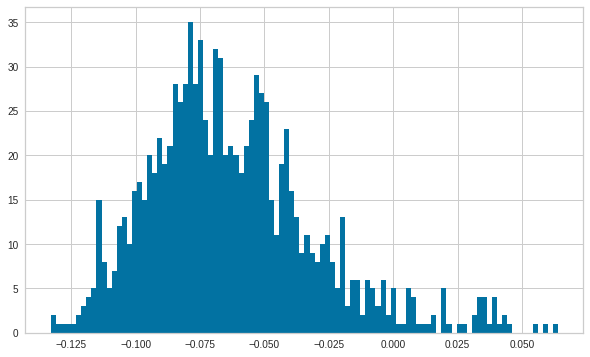

In [20]:
results['Anomaly_Score'].hist(bins=100, figsize=(10,6))

For any other model, let's try for KNN model

In [13]:
knn = create_model('knn')
print(knn)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


In [22]:
from sklearn import set_config
set_config(display=None)

In [23]:
l

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 IForest(behaviour='ne

In [27]:
set_config(display="diagram")
l

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=200, n_jobs=-1,
    random_state=123, verbose=0)]],
         verbose=False)

#Deployment

In [ ]:
deploy_model(iforest, 'iforest-abc', platform = 'aws', 
             authentication = {'bucket' : 'pycaret-test'})

----------------------